<a href="https://colab.research.google.com/github/seon0415/BDA/blob/main/%EB%B0%95%EC%84%9C%EC%97%B029_0409_%ED%95%84%EC%88%98%EA%B3%BC%EC%A0%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import probplot


In [ ]:
wine= pd.read_csv('wine_test.csv')

In [ ]:
wine

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


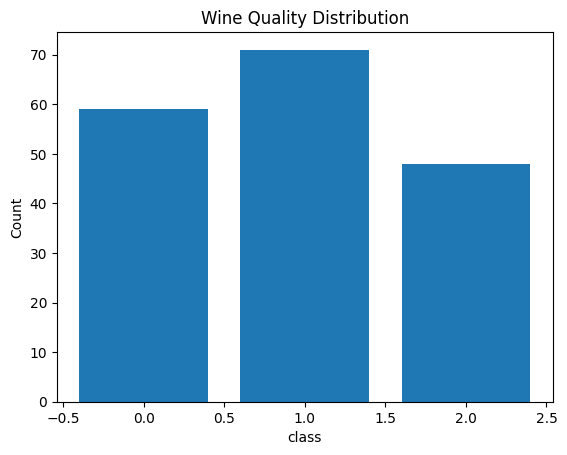

In [ ]:
# 클래스 당 몇개의 와인이 있을까

plt.bar(wine['class'].value_counts().index, wine['class'].value_counts().values)

plt.xlabel('class')
plt.ylabel('Count')
plt.title('Wine xLaa Distribution')
plt.show()

Text(0, 0.5, 'color_intensity')

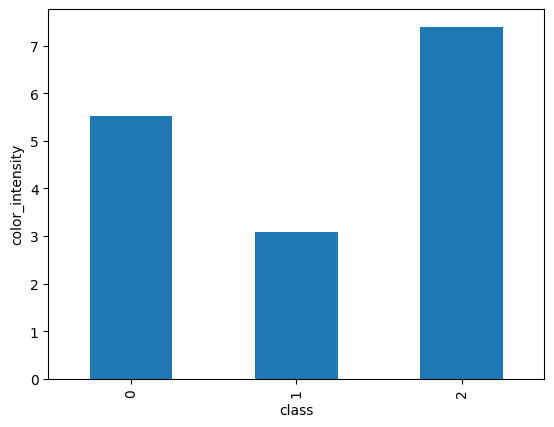

In [ ]:
# class별 색상강도 평균
data=wine.groupby("class")['color_intensity'].mean()

data.plot(kind='bar')

plt.xlabel('class')
plt.ylabel('color_intensity')

##class-색상강도

In [ ]:
data0=wine.query('`class`==0')['color_intensity']
data1=wine.query('`class`==1')['color_intensity']
data2=wine.query('`class`==2')['color_intensity']

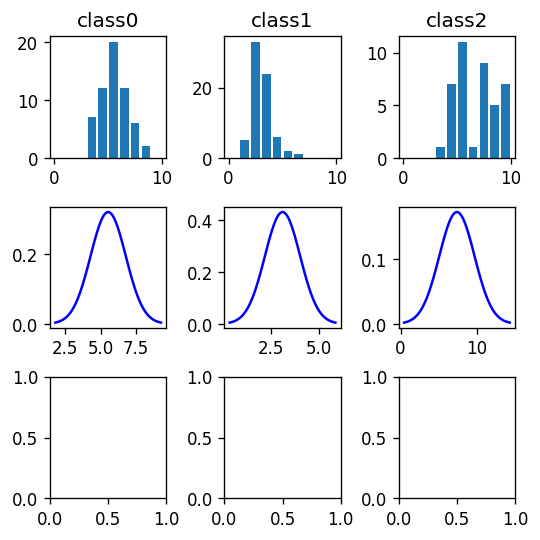

((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([3.52, 3.58, 3.7 , 3.8 , 3.84, 3.93, 3.95, 4.2 , 4.25, 4.28, 4.32,
         4.36, 4.38, 4.5 , 4.5 , 4.6 , 4.7 , 4.8

In [ ]:
##**class** 별 색상강도 분포

import matplotlib.pyplot as plt
from scipy.stats import norm

fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(5,5))

#class0
ax[0][0].hist(data0, bins=10, range=(0, 10), rwidth=0.8)
ax[0][0].set_title('class0')

#class1
ax[0][1].hist(data1, bins=10, range=(0, 10), rwidth=0.8)
ax[0][1].set_title('class1')

#class2
ax[0][2].hist(data2, bins=10, range=(0, 10), rwidth=0.8)
ax[0][2].set_title('class2')

#class0 정규분포 시각화
mu=data0.mean()
sigma = data0.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][0].plot(x, pdf, color='blue')

#class1 정규분포 시각화
mu=data1.mean()
sigma = data1.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][1].plot(x, pdf, color='blue')

#class2 정규분포 시각화
mu=data2.mean()
sigma = data2.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][2].plot(x, pdf, color='blue')

plt.subplots_adjust(wspace= 0.5, hspace= 0.4)
plt.show()

#class 0 proplot

probplot(data0, plot=ax[2][0], dist='norm')


Text(0.5, 1.0, 'CLASS==2')

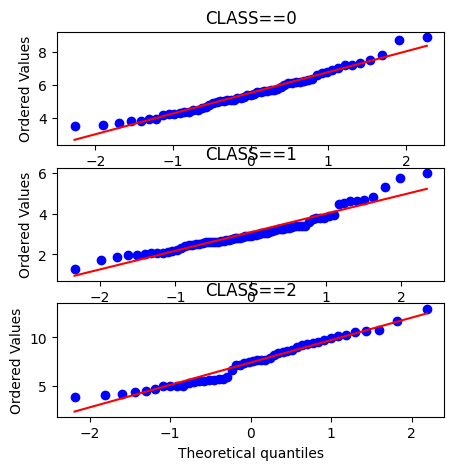

In [ ]:
plt.figure(figsize=(5,5))

plt.subplot(3,1,1)
stats.probplot(data0,plot=plt)
plt.title('CLASS==0')

plt.subplot(3,1,2)
stats.probplot(data1,plot=plt)
plt.title('CLASS==1')

plt.subplot(3,1,3)
stats.probplot(data2,plot=plt)
plt.title('CLASS==2')

####클라스 별 색상강도 t검정

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(data0, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-5.340583483187493, pvalue=5.402431422199361e-07)

In [ ]:
stats.ttest_ind(data0, data1, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=12.852536979361243, pvalue=8.582794060323507e-25)

In [ ]:
stats.ttest_ind(data1, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-14.148445833386669, pvalue=4.239911922737719e-27)

####클라스별 색상강도 shapiro 검정

In [ ]:
##클라스 0 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data0)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스0은 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.968, p=0.125
클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
##클라스 1 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스1는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스1는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.932, p=0.001
클라스1는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)


In [ ]:
##클라스 2 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스2는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.958, p=0.088
클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
##클라스- 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스2는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

##class-hue

In [ ]:
hue0=wine.query('`class`==0')['hue']
hue1=wine.query('`class`==1')['hue']
hue2=wine.query('`class`==2')['hue']

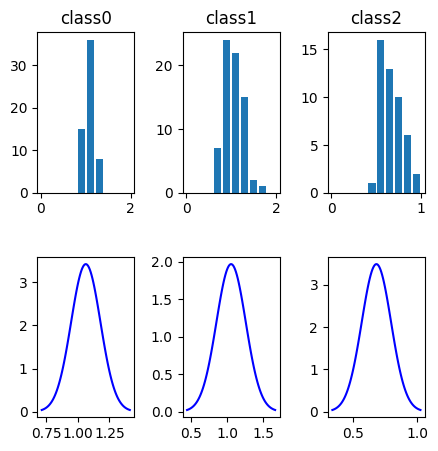

In [ ]:
##**class** 별 hue 분포

import matplotlib.pyplot as plt

fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(5,5))

#class0
ax[0][0].hist(hue0, bins=10, range=(0, 2), rwidth=0.8)
ax[0][0].set_title('class0')

#class1
ax[0][1].hist(hue1, bins=10, range=(0, 2), rwidth=0.8)
ax[0][1].set_title('class1')

#class2
ax[0][2].hist(hue2, bins=10, range=(0, 1), rwidth=0.8)
ax[0][2].set_title('class2')

#class0 정규분포 시각화
mu=hue0.mean()
sigma = hue0.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][0].plot(x, pdf, color='blue')

#class1 정규분포 시각화
mu=hue1.mean()
sigma = hue1.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][1].plot(x, pdf, color='blue')

#class2 정규분포 시각화
mu=hue2.mean()
sigma = hue2.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][2].plot(x, pdf, color='blue')

plt.subplots_adjust(wspace= 0.5, hspace= 0.4)
plt.show()

Text(0.5, 1.0, 'CLASS==2')

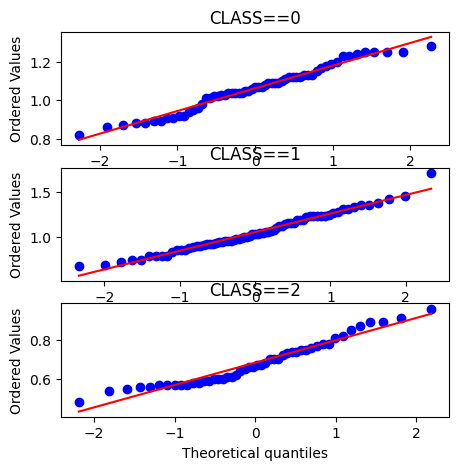

In [ ]:
plt.figure(figsize=(5,5))

plt.subplot(3,1,1)
stats.probplot(hue0,plot=plt)
plt.title('CLASS==0')

plt.subplot(3,1,2)
stats.probplot(hue1,plot=plt)
plt.title('CLASS==1')

plt.subplot(3,1,3)
stats.probplot(hue2,plot=plt)
plt.title('CLASS==2')

(array([ 1.,  9., 10.,  6.,  4.,  7.,  4.,  2.,  4.,  1.]),
 array([0.48 , 0.528, 0.576, 0.624, 0.672, 0.72 , 0.768, 0.816, 0.864,
        0.912, 0.96 ]),
 <BarContainer object of 10 artists>)

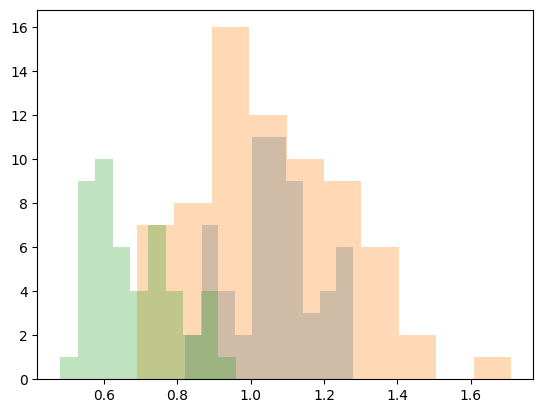

In [ ]:
plt.hist(hue0, alpha=0.3)
plt.hist(hue1, alpha=0.3)
plt.hist(hue2, alpha=0.3)

####클라스 별 hue t검정

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(hue0, hue2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-5.340583483187493, pvalue=5.402431422199361e-07)

In [ ]:
stats.ttest_ind(hue0, hue1, equal_var=True)
# 유의수준 0.05보다 훨씬 크므로,  대립가설을 채택할 수 없습니다. 

Ttest_indResult(statistic=0.19284236940182017, pvalue=0.8473880636422892)

In [ ]:
stats.ttest_ind(hue1, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-23.03236481421084, pvalue=2.7614750148648085e-45)

####클라스별 hue shapiro 검정

In [ ]:
##클라스 1 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(hue0)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스0은 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.970, p=0.151
클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
##클라스 1 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(hue1)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스1는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스1는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.977, p=0.225
클라스1는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
##클라스 2 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(hue2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스2는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.946, p=0.028
클라스2는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)


##class-proline

In [ ]:
data0=wine.query('`class`==0')['proline']
data1=wine.query('`class`==1')['proline']
data2=wine.query('`class`==2')['proline']

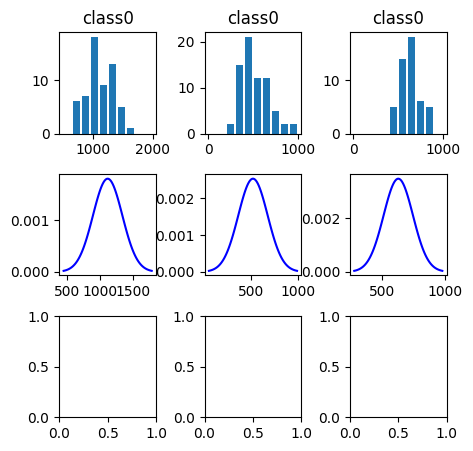

((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([ 680,  735,  760,  770,  780,  795,  830,  845,  845,  880,  885,
          915,  920,  970,  985,  990, 1015, 102

In [ ]:
##**class** 별 색상강도 분포

import matplotlib.pyplot as plt
from scipy.stats import norm

fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(5,5))

#class0 히스토그램
ax[0][0].hist(data0, bins=10, range=(500,2000), rwidth=0.8)
ax[0][0].set_title('class0')

#class1
ax[0][1].hist(data1, bins=10, range=(0, 1000), rwidth=0.8)
ax[0][1].set_title('class0')

#class2
ax[0][2].hist(data2, bins=10, range=(0, 1000), rwidth=0.8)
ax[0][2].set_title('class0')

#class0 정규분포 시각화
mu=data0.mean()
sigma = data0.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][0].plot(x, pdf, color='blue')

#class1 정규분포 시각화
mu=data1.mean()
sigma = data1.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][1].plot(x, pdf, color='blue')

#class2 정규분포 시각화
mu=data2.mean()
sigma = data2.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][2].plot(x, pdf, color='blue')

plt.subplots_adjust(wspace= 0.5, hspace= 0.4)
plt.show()

#class 0 
probplot(data0, plot=ax[2][0])


Text(0.5, 1.0, 'CLASS==2')

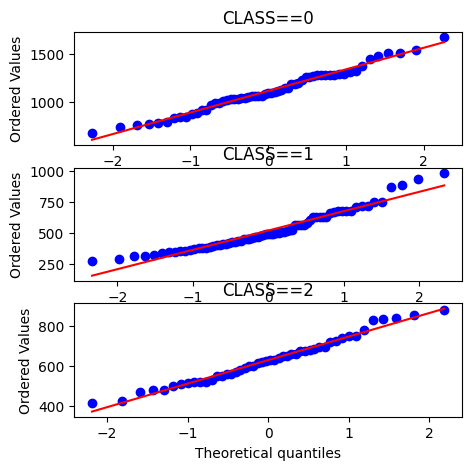

In [ ]:
plt.figure(figsize=(5,5))

plt.subplot(3,1,1)
stats.probplot(data0,plot=plt)
plt.title('CLASS==0')

plt.subplot(3,1,2)
stats.probplot(data1,plot=plt)
plt.title('CLASS==1')

plt.subplot(3,1,3)
stats.probplot(data2,plot=plt)
plt.title('CLASS==2')

(array([2., 4., 8., 7., 6., 8., 5., 3., 1., 4.]),
 array([415. , 461.5, 508. , 554.5, 601. , 647.5, 694. , 740.5, 787. ,
        833.5, 880. ]),
 <BarContainer object of 10 artists>)

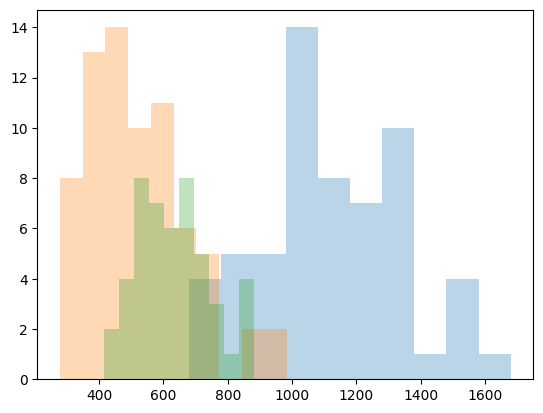

In [ ]:
plt.hist(data0, alpha=0.3)
plt.hist(data1, alpha=0.3)
plt.hist(data2, alpha=0.3)


####클라스 별 hue t검정

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(data0, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=13.750977246398044, pvalue=3.1714999203264234e-25)

In [ ]:
stats.ttest_ind(data0, data1, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=17.89907273959809, pvalue=1.1896804482847763e-36)

In [ ]:
stats.ttest_ind(data1, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-4.1659199771343784, pvalue=5.9636706042794836e-05)

####클라스별 proline shapiro 검정

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(data0)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스0은 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.982, p=0.523
클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
##클라스 0 hue shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data0)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스0는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스0는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.982, p=0.523
클라스0는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
##클라스 1 hue shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스1는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스1는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.939, p=0.002
클라스1는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)


In [ ]:
##클라스 2 hue shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스2는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.977, p=0.458
클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


##전체 히스토그램

<Axes: >

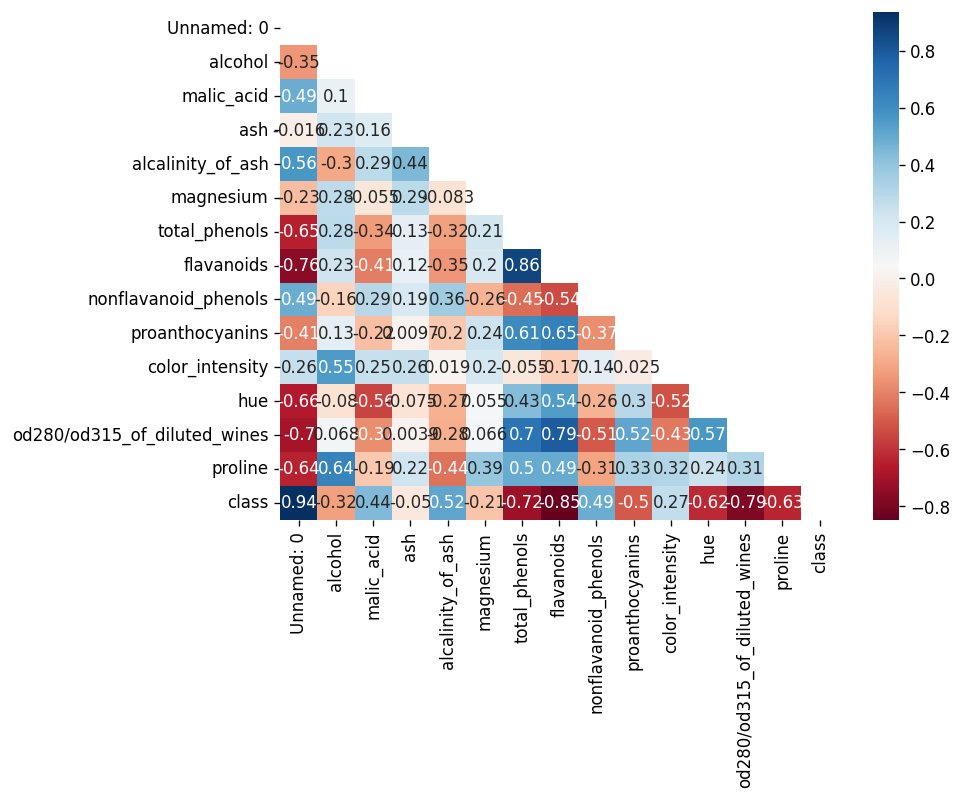

In [ ]:
wine_cor=wine.corr()
wine_cor

import numpy as np
mask=np.zeros_like(wine_cor)

plt.rcParams.update({'figure.dpi':'120',            #해상도 설정
                     'figure.figsize':[7.5, 5.5]})   #가로 세로 크기 설정

#오른쪽 위 대각행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)]=1

#히트맵에 mask 적용하기
import seaborn as sns
sns.heatmap(wine_cor,
            annot=True,
            cmap='RdBu',
            mask=mask)    

In [ ]:
pro0=wine.query('`class`==0')['proline']
pro1=wine.query('`class`==1')['proline']
pro2=wine.query('`class`==2')['proline']

In [ ]:
od0=wine.query('`class`==0')['od280/od315_of_diluted_wines']
od1=wine.query('`class`==1')['od280/od315_of_diluted_wines']
od2=wine.query('`class`==2')['od280/od315_of_diluted_wines']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fb3b18f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fb3858ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fb3833a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fb3859420>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fb38596c0>],
 'means': []}

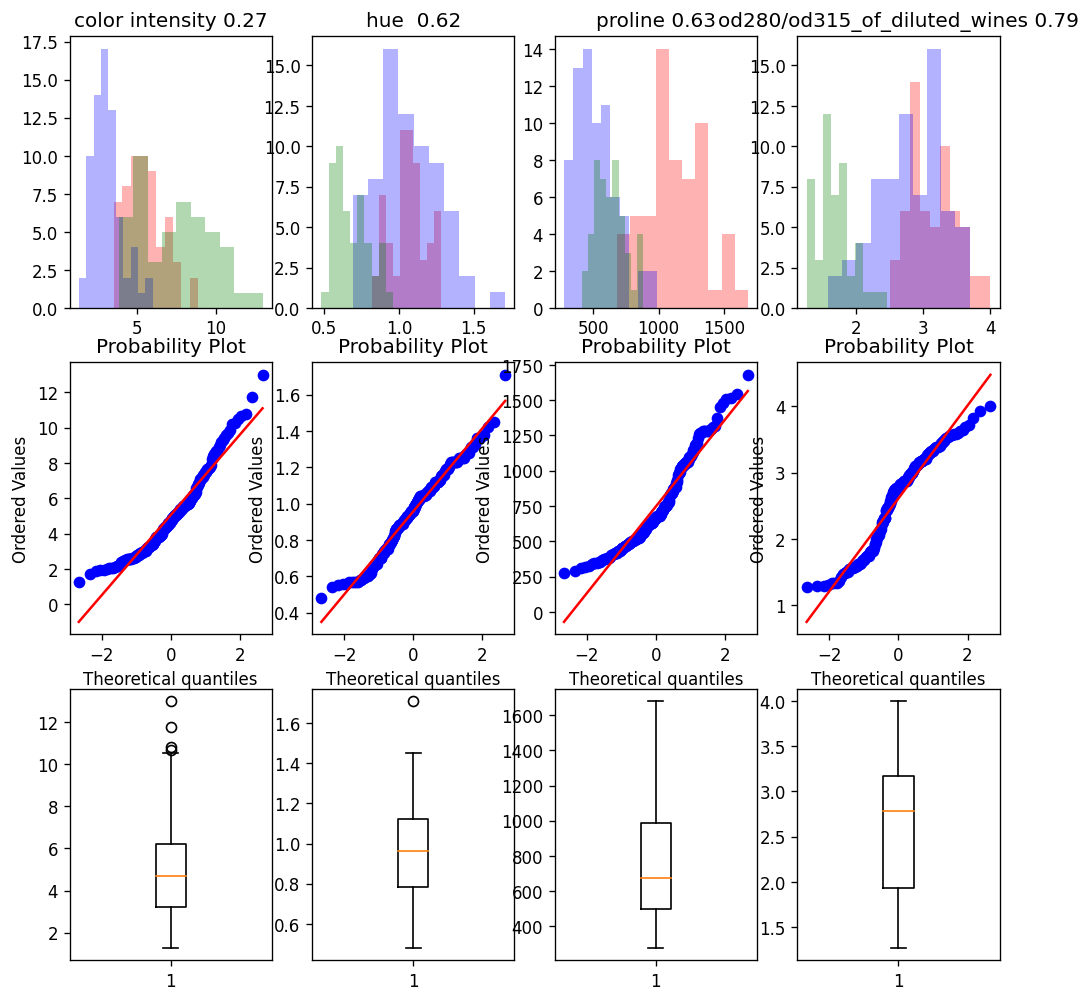

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,4,1)
plt.hist(data0, alpha=0.3, color='red')
plt.hist(data1, alpha=0.3, color='blue')
plt.hist(data2, alpha=0.3, color='green')
plt.title('color intensity 0.27')

plt.subplot(3,4,2)
plt.hist(hue0, alpha=0.3, color='red')
plt.hist(hue1, alpha=0.3, color='blue')
plt.hist(hue2, alpha=0.3, color='green')
plt.title('hue  0.62')

plt.subplot(3,4,3)
plt.hist(pro0, alpha=0.3, color='red')
plt.hist(pro1, alpha=0.3, color='blue')
plt.hist(pro2, alpha=0.3, color='green')
plt.title('proline 0.63')

plt.subplot(3,4,4)
plt.hist(od0, alpha=0.3, color='red')
plt.hist(od1, alpha=0.3, color='blue')
plt.hist(od2, alpha=0.3, color='green')
plt.title('od280/od315_of_diluted_wines 0.79')

plt.subplot(3,4,5)
stats.probplot(wine['color_intensity'],plot=plt)

plt.subplot(3,4,6)
stats.probplot(wine['hue'],plot=plt)

plt.subplot(3,4,7)
stats.probplot(wine['proline'],plot=plt)

plt.subplot(3,4,8)
stats.probplot(wine['od280/od315_of_diluted_wines'],plot=plt)

plt.subplot(3,4,9)
plt.boxplot(wine['color_intensity'])

plt.subplot(3,4,10)
plt.boxplot(wine['hue'])

plt.subplot(3,4,11)
plt.boxplot(wine['proline'])

plt.subplot(3,4,12)
plt.boxplot(wine['od280/od315_of_diluted_wines'])

In [ ]:
wine.columns

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

Unnamed: 0
Shapiro-Wilk test for Unnamed: 0: p-value = 1.7095897419494577e-05
Anderson-Darling test for Unnamed: 0: statistic = 1.9480343304443863, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for Unnamed: 0: p-value = 4.0738578286387e-310
D'Agostino and Pearson's test for Unnamed: 0: p-value = 6.145459060897731e-18, 



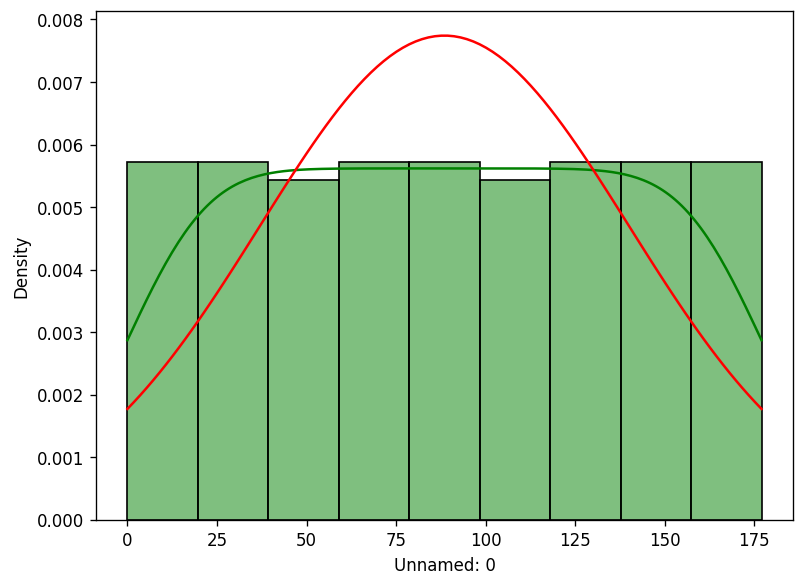

alcohol
Shapiro-Wilk test for alcohol: p-value = 1.0
Anderson-Darling test for alcohol: statistic = nan, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for alcohol: p-value = nan
D'Agostino and Pearson's test for alcohol: p-value = nan, 



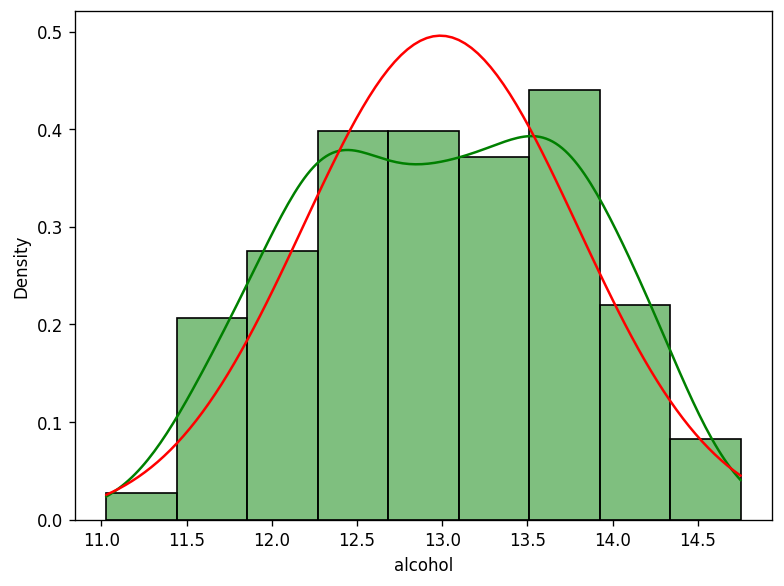

malic_acid
Shapiro-Wilk test for malic_acid: p-value = 2.94582247484243e-10
Anderson-Darling test for malic_acid: statistic = 7.619251283009817, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for malic_acid: p-value = 2.1960240394690426e-126
D'Agostino and Pearson's test for malic_acid: p-value = 3.1742168603714762e-06, 



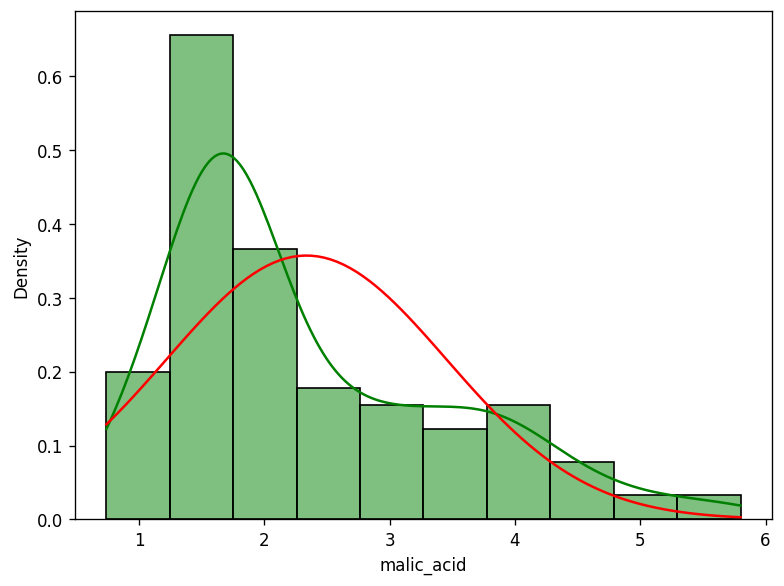

ash
Shapiro-Wilk test for ash: p-value = 0.038691021502017975
Anderson-Darling test for ash: statistic = 0.6784320885859643, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for ash: p-value = 1.0018155238058482e-231
D'Agostino and Pearson's test for ash: p-value = 0.03631602067034469, 



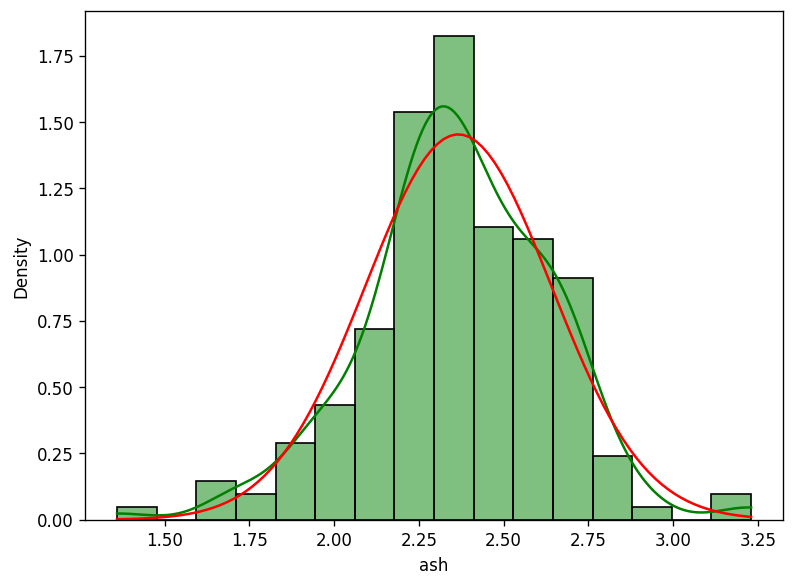

alcalinity_of_ash
Shapiro-Wilk test for alcalinity_of_ash: p-value = 0.26394858956336975
Anderson-Darling test for alcalinity_of_ash: statistic = 0.5007580138051821, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for alcalinity_of_ash: p-value = 0.0
D'Agostino and Pearson's test for alcalinity_of_ash: p-value = 0.21004273588925534, 



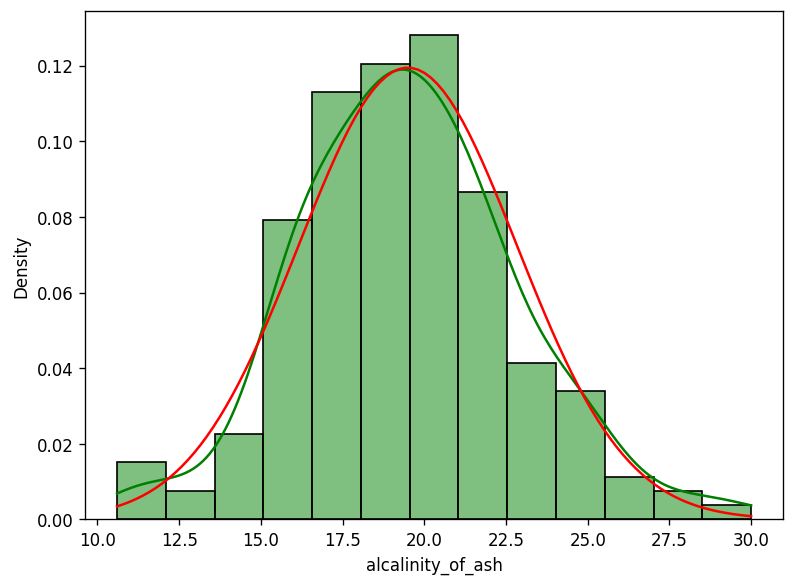

magnesium
Shapiro-Wilk test for magnesium: p-value = 6.345416068143095e-07
Anderson-Darling test for magnesium: statistic = 2.33084523288278, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for magnesium: p-value = 0.0
D'Agostino and Pearson's test for magnesium: p-value = 4.658884716268434e-09, 



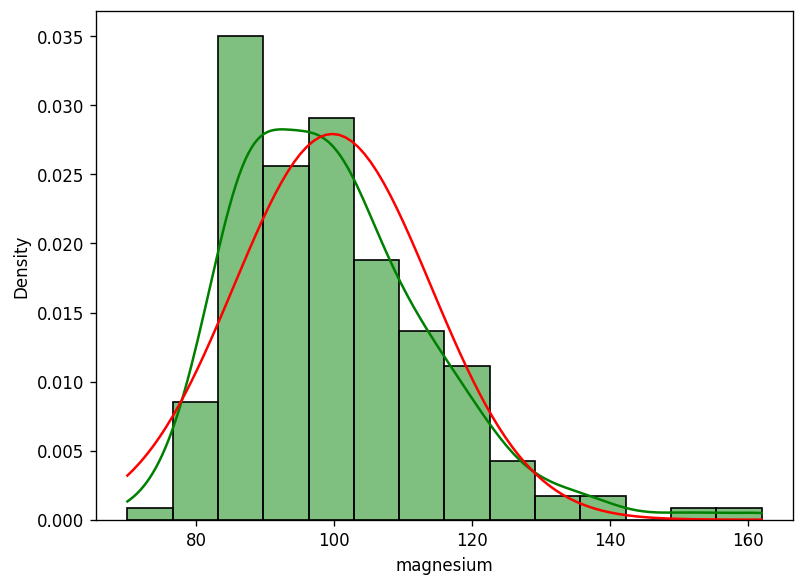

total_phenols
Shapiro-Wilk test for total_phenols: p-value = 0.0043947165831923485
Anderson-Darling test for total_phenols: statistic = 1.4212965168897824, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for total_phenols: p-value = 8.681887443863243e-163
D'Agostino and Pearson's test for total_phenols: p-value = 0.0005556667174637149, 



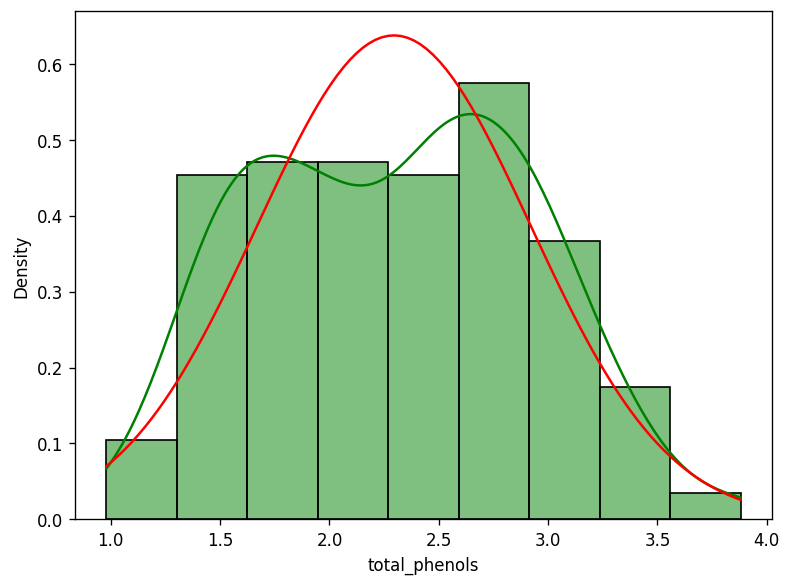

flavanoids
Shapiro-Wilk test for flavanoids: p-value = 1.6790636436780915e-05
Anderson-Darling test for flavanoids: statistic = 2.4741719413496526, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for flavanoids: p-value = 8.643713578290511e-81
D'Agostino and Pearson's test for flavanoids: p-value = 0.00012693297763919295, 



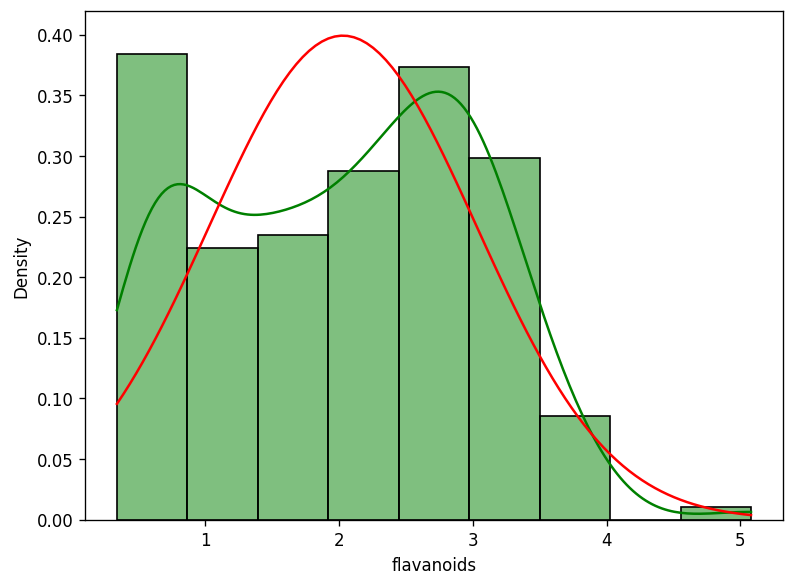

nonflavanoid_phenols
Shapiro-Wilk test for nonflavanoid_phenols: p-value = 1.0
Anderson-Darling test for nonflavanoid_phenols: statistic = nan, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for nonflavanoid_phenols: p-value = nan
D'Agostino and Pearson's test for nonflavanoid_phenols: p-value = nan, 



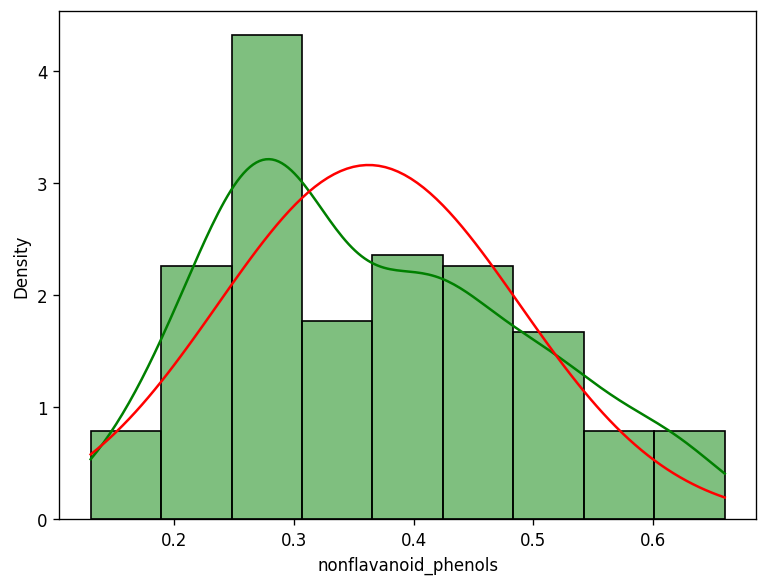

proanthocyanins
Shapiro-Wilk test for proanthocyanins: p-value = 0.01445252075791359
Anderson-Darling test for proanthocyanins: statistic = 0.6997740097069709, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for proanthocyanins: p-value = 3.8542663382737e-96
D'Agostino and Pearson's test for proanthocyanins: p-value = 0.008000813483971013, 



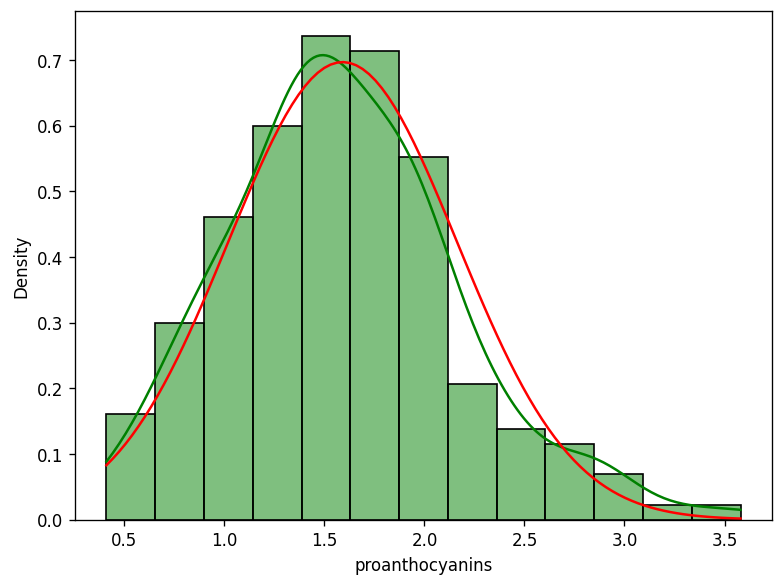

color_intensity
Shapiro-Wilk test for color_intensity: p-value = 9.230111004399078e-07
Anderson-Darling test for color_intensity: statistic = 2.844061200457247, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for color_intensity: p-value = 2.3762038081566107e-249
D'Agostino and Pearson's test for color_intensity: p-value = 5.31947611640046e-05, 



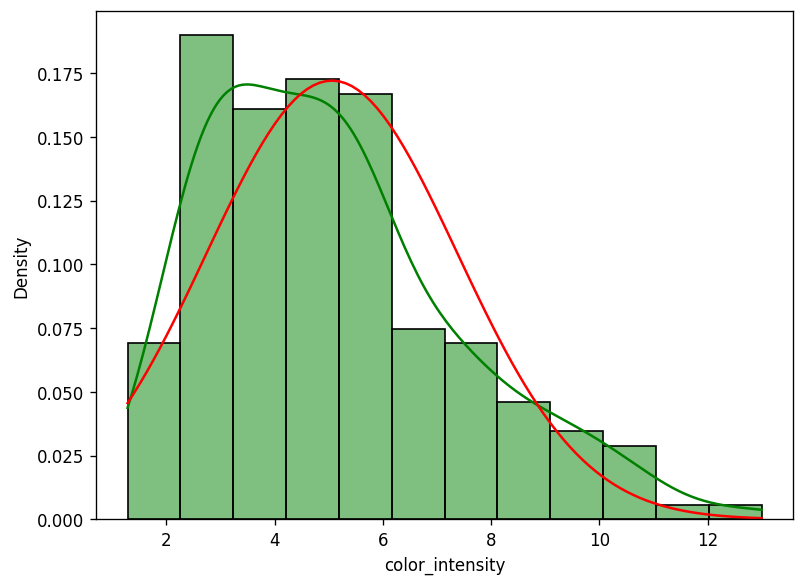

hue
Shapiro-Wilk test for hue: p-value = 0.01742566004395485
Anderson-Darling test for hue: statistic = 0.8382421753375411, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for hue: p-value = 6.957509416669647e-88
D'Agostino and Pearson's test for hue: p-value = 0.594729042205703, 



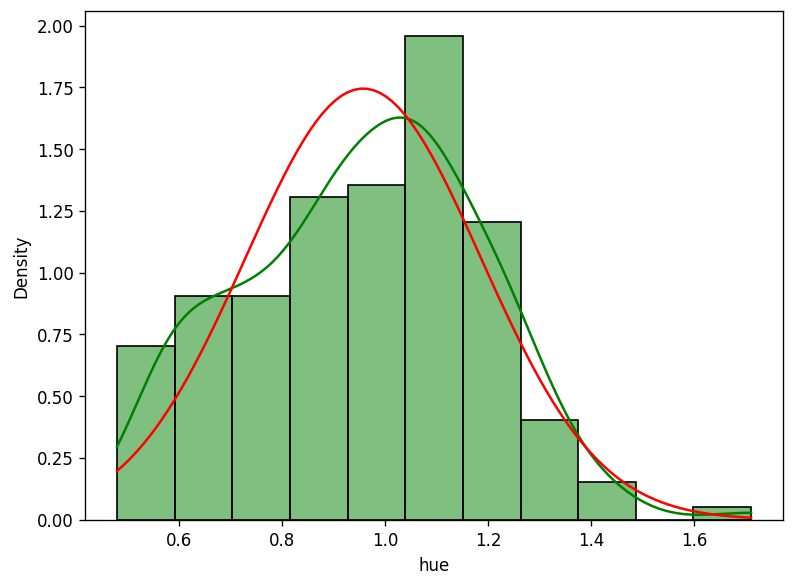

od280/od315_of_diluted_wines
Shapiro-Wilk test for od280/od315_of_diluted_wines: p-value = 2.315865231139469e-06
Anderson-Darling test for od280/od315_of_diluted_wines: statistic = 3.4956189140152674, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for od280/od315_of_diluted_wines: p-value = 7.8289971663547145e-177
D'Agostino and Pearson's test for od280/od315_of_diluted_wines: p-value = 4.8789809118220485e-11, 



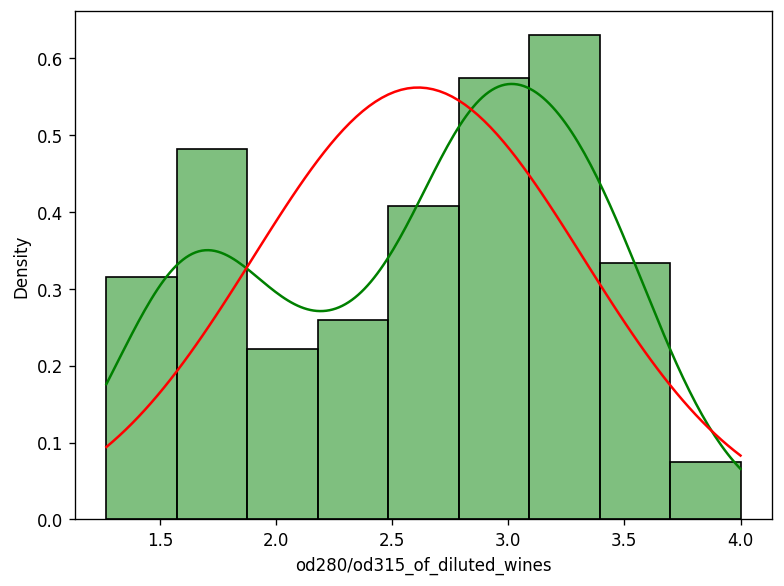

proline
Shapiro-Wilk test for proline: p-value = 1.7412214958767436e-07
Anderson-Darling test for proline: statistic = 4.100287837227199, critical values = [0.564 0.642 0.77  0.899 1.069], significance level = [15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for proline: p-value = 0.0
D'Agostino and Pearson's test for proline: p-value = 0.0004256462644890612, 



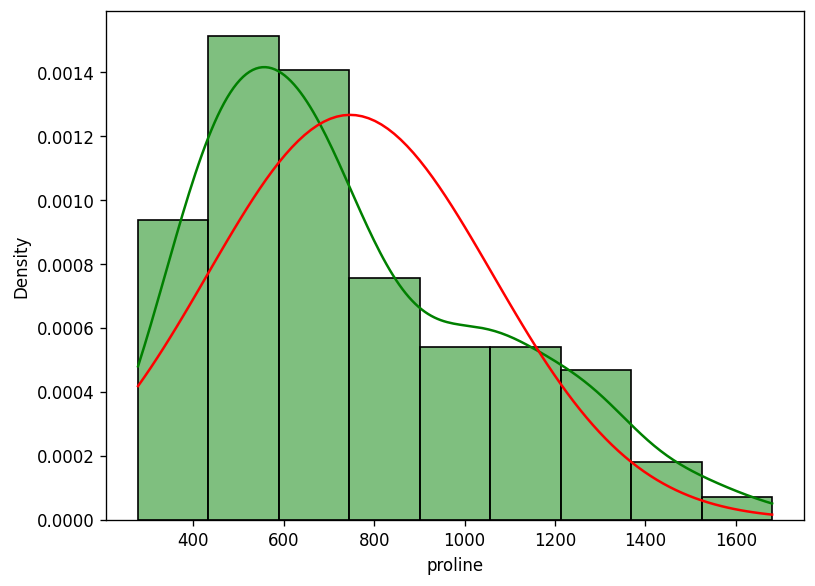

In [ ]:
#각 컬럼 정규분포와 비교분석
from scipy.stats import shapiro, anderson, kstest, normaltest
from scipy.stats import norm
import seaborn as sns

for col in wine.columns[:-1]:
    print(col)

    data = wine[col]
    # Shapiro-Wilk test
    w, p = shapiro(data)
    print(f"Shapiro-Wilk test for {col}: p-value = {p}")
    
    # Anderson-Darling test
    ad, crit, sig = anderson(data, dist='norm')
    print(f"Anderson-Darling test for {col}: statistic = {ad}, critical values = {crit}, significance level = {sig}")
    
    # Kolmogorov-Smirnov test
    ks, p = kstest(data, 'norm')
    print(f"Kolmogorov-Smirnov test for {col}: p-value = {p}")
    
    # D'Agostino and Pearson's normality test
    stat, p = normaltest(data)
    print(f"D'Agostino and Pearson's test for {col}: p-value = {p}, \n")

    #비교분석
    sns.histplot(data, kde=True, stat='density', color='green', alpha=0.5)
    sns.lineplot(x=np.linspace(data.min(), data.max(), 100), y=norm.pdf(np.linspace(data.min(), data.max(), 100), loc=data.mean(), scale=data.std()), color='red')
    plt.show()

 정규분포를 따르는 데이터는 

 히스토그램과 커널 밀도 추정 그래프에서 종모양의 분포를 띠고, 정규분포 곡선에서 평균값을 중심으로 대칭적인 형태를 띄고, p-value(유의수준)가 0.05보다 커야하므로 
 
 이를 만족시키는 변수는 alcalinity_of_ash으로 나타났습니다.